In [105]:
import numpy as np

# This script will model a 2-state Markov chain model (MCM) for gene expression. 

# The first state will be an inactive transcription state and will be represented by the value 0.

# The second state will be an active transcription state and will be represented by the value 1.



# Function that determines the next state of the 2-state MCM using a binomial distribution.

def transcription_state(state, p1, p2):
    
    
    # Transition from inactive to active state with a binomial distribution with p1 probability of success.
    
    activate = np.random.binomial(1, p1)
    
    
    # Transition from active to inactive state with a binomial distribution with p2 probability of success.

    repress = np.random.binomial(1, p2)
    
    
    # If the state is inactive and the transition to active succeeds then return an active state.

    if state == 0 and activate == 1:
        
        return 1
    
    
    # If the state is inactive and the transition to active fails, return an inactive state.
    
    elif state == 0 and activate == 0:
        
        return 0
    
    
    # If the state is active and the transition to inactive succeeds then return an inactive state.
    
    elif state == 1 and repress == 1:
        
        return 0
    
    
    # If the state is active and the transition to inactive fails, return an active state.
    
    elif state == 1 and repress == 0:
        
        return 1
    

# Initial state
    
state = 0


# Empty array to hold state transition history.

state_history = []


# Iterates a given number of times calculating the next state using the previous state.

for i in range(0, 1000):
    
    
    # Assigns the next transition state to the variable state.
    
    state = transcription_state(state, 0.25, 0.25)
    
    
    # Adds the next transition state to the array state_histroy.
    
    state_history.append(state)
    

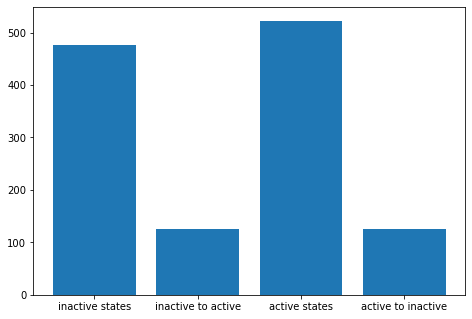

In [110]:
import matplotlib.pyplot as plt


# Number of active states in state_history

active = sum(state_history)


# Number of inactive states in state_history

inactive = len(state_history) - active


# Will record number of transitions from inactive to active.

active_transition = 0


# Will record number of transitions from active to inactive.

inactive_transition = 0


# Iterates over the length of state_histroy - 1

for i in range(0, len(state_history) - 1):
    
    
    # Assigns the current state in the iteration to current_state
    
    current_state = state_history[i]
    
    
    # Assigns the next state in the iteration to current_state
    
    next_state = state_history[i + 1]
    
    
    # If the current state is inactive and the next state is active then record in active_transition.
    
    if current_state == 0 and next_state == 1:
        
        active_transition += 1
        
    
    # If the current state is active and the next state is inactive then record in inactive_transition
        
    elif current_state == 1 and next_state == 0:
        
        inactive_transition += 1
        

# Generates bar graph for the number of inactive, active, active_transitions, and inactive_transitions that are in state_history.
        
fig = plt.figure()

ax = fig.add_axes([0,0,1,1])

labels = ['inactive states', 'inactive to active', 'active states', 'active to inactive']

state_stats = [inactive, active_transition, active, inactive_transition]

ax.bar(labels, state_stats)

plt.show()